In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_image

In [3]:
import matplotlib.pyplot as plt

In [22]:
depth, width = 1000, 1000
domain = np.linspace(0, 10, depth)
signal = lambda : sum(np.sin(domain * x) for x in np.random.randint(1, 30, 50))
slide = np.r_[[signal() for _ in range(depth)]]

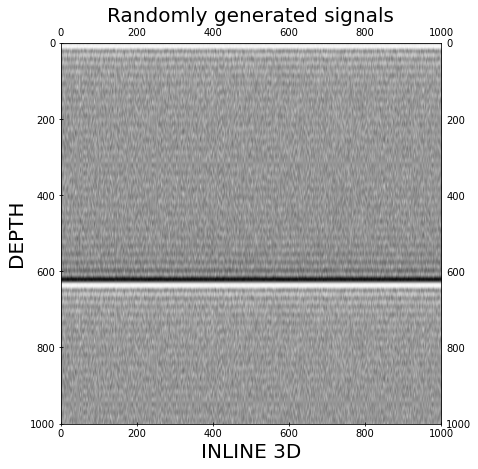

In [44]:
annotation_params = {
    'title_label': "Randomly generated signals",
    'xlabel': "INLINE 3D",
    'ylabel': "DEPTH"
}

plot_image(slide, **annotation_params)

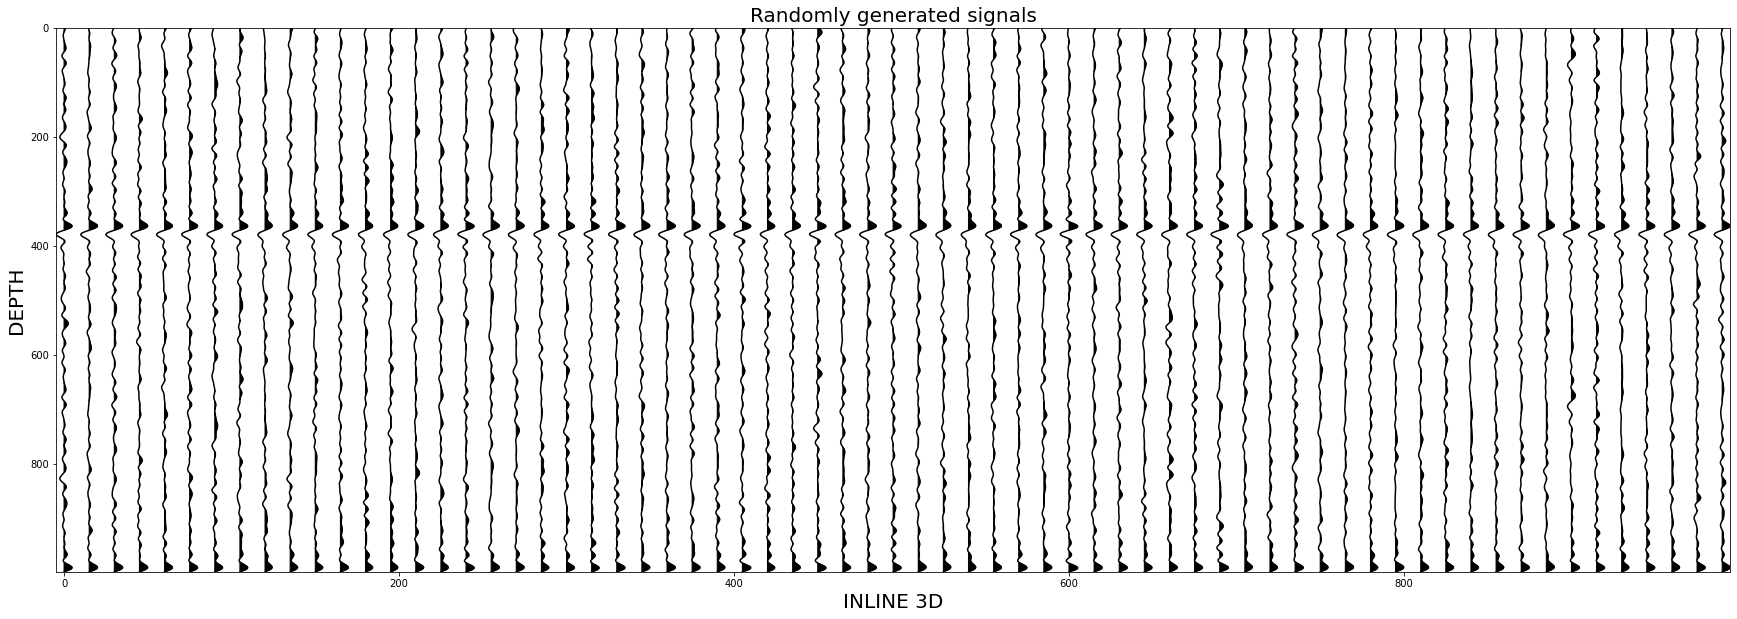

In [165]:
figure_params = {
    'mode': 'wiggle',
    'figsize' : (30,10)
}
plot_image(slide, **figure_params, **annotation_params)

In [51]:
curve_mask = np.full((depth, width), np.nan)
curve_height = np.argmin(slide, axis=1).min()
curve_width = 12
curve_mask[:, curve_height - curve_width // 2 : curve_height + curve_width // 2] = 1

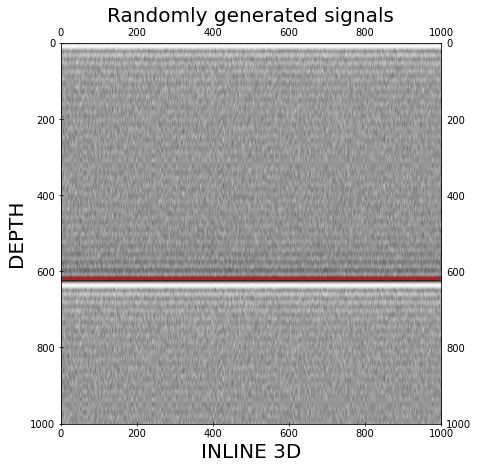

In [52]:
plot_image([slide, curve_mask], **annotation_params)

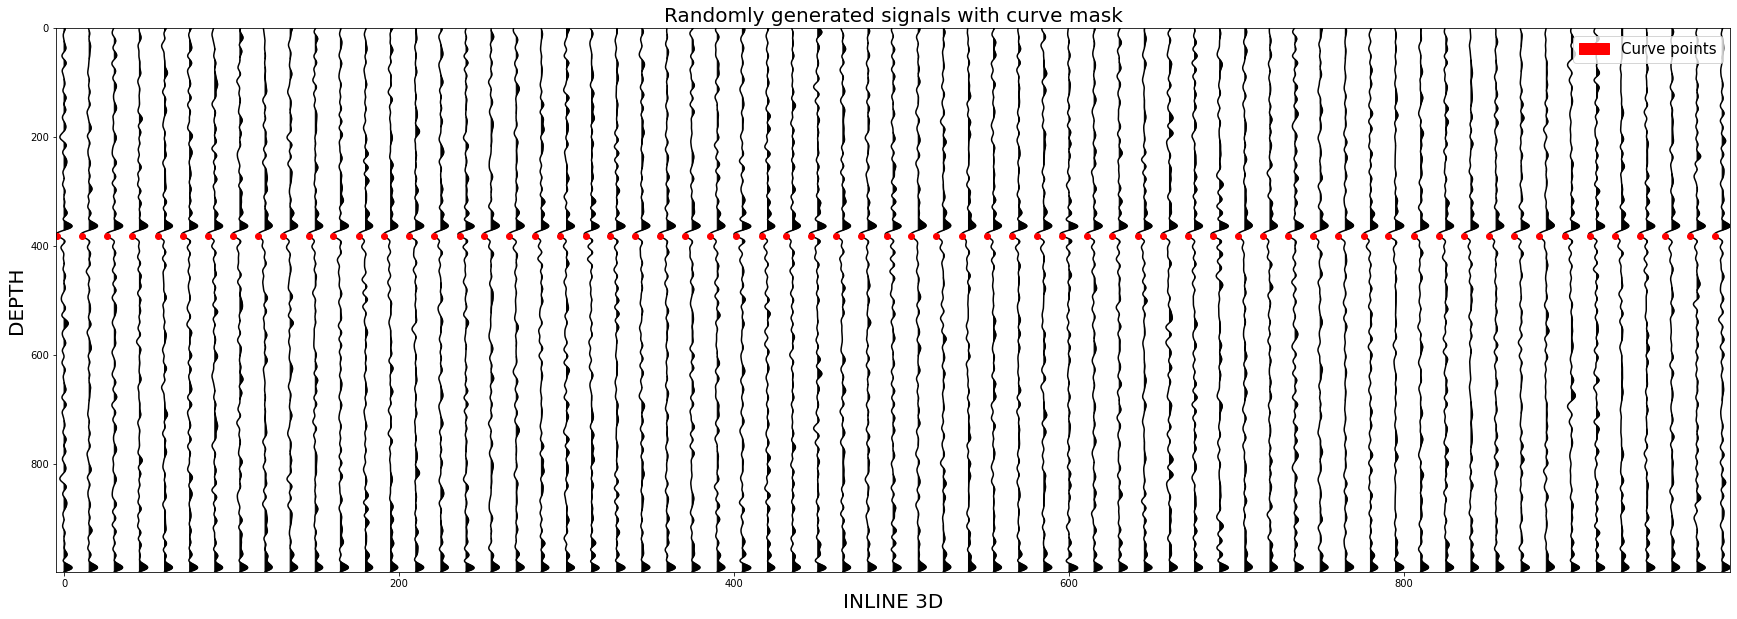

In [206]:
wiggle_params = {
    'curve_width': curve_width
}
annotation_params['title'] = "Randomly generated signals with curve mask"
annotation_params['legend_label'] = 'Curve points'

plot_image([slide, curve_mask], **wiggle_params, **figure_params, **annotation_params)

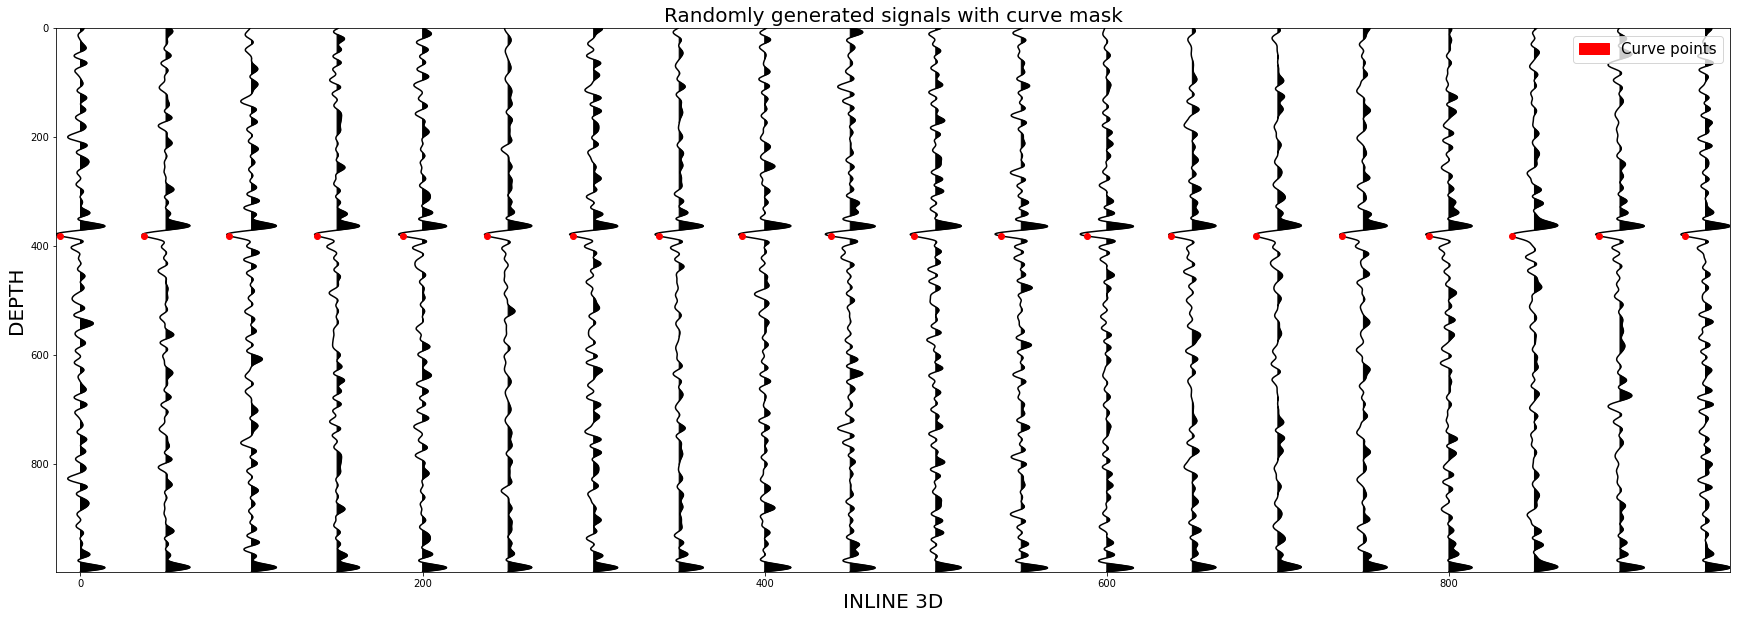

In [207]:
wiggle_params['step'] = 50
wiggle_params['width_multiplier'] = 3

plot_image([slide, curve_mask], **wiggle_params, **figure_params, **annotation_params)

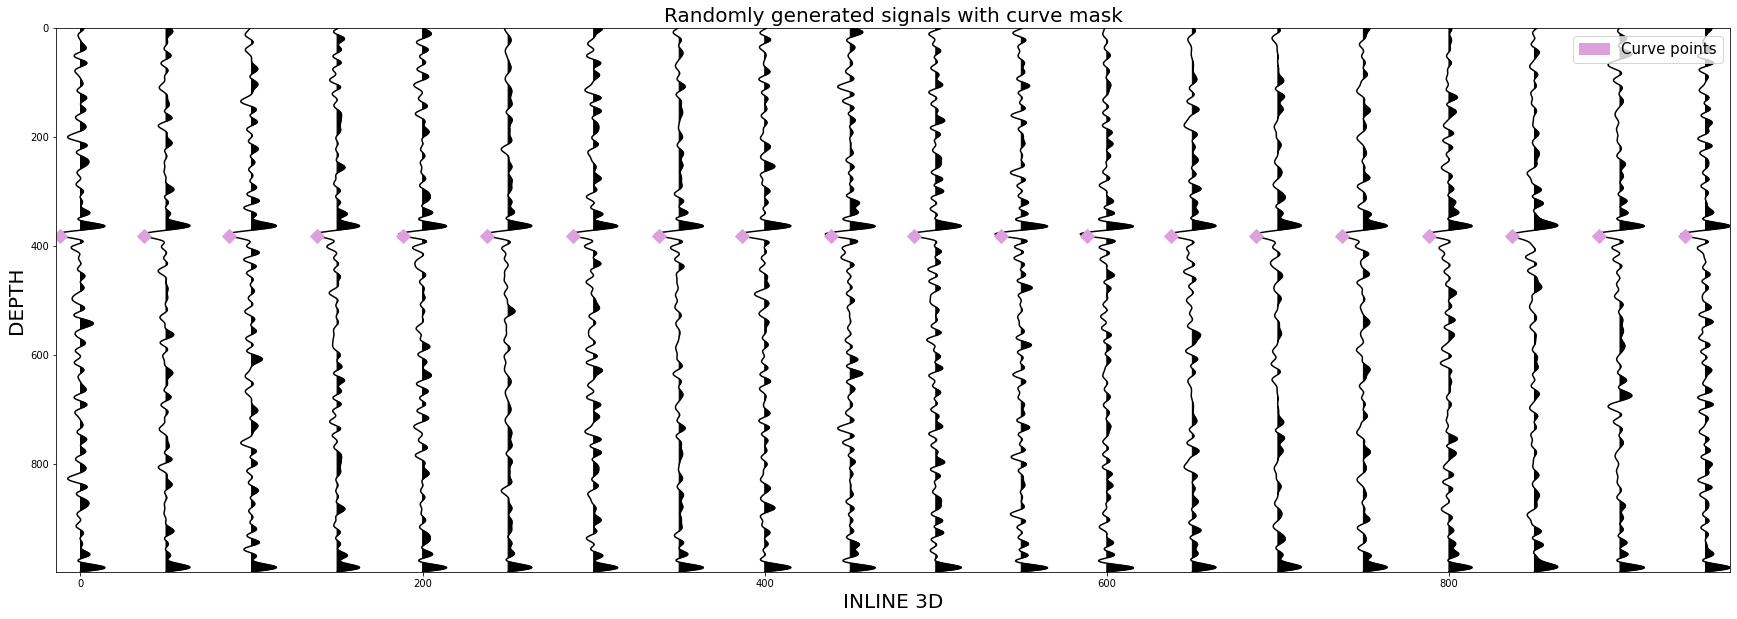

In [209]:
curve_params = {
    'color': 'plum',
    'marker': 'D',
    'markersize': 10,
}

plot_image([slide, curve_mask], **wiggle_params, **curve_params, **figure_params, **annotation_params)

In [210]:
var = 40
extra_curve = np.random.randint(var, depth - var) + np.random.randint(-var, var, width)

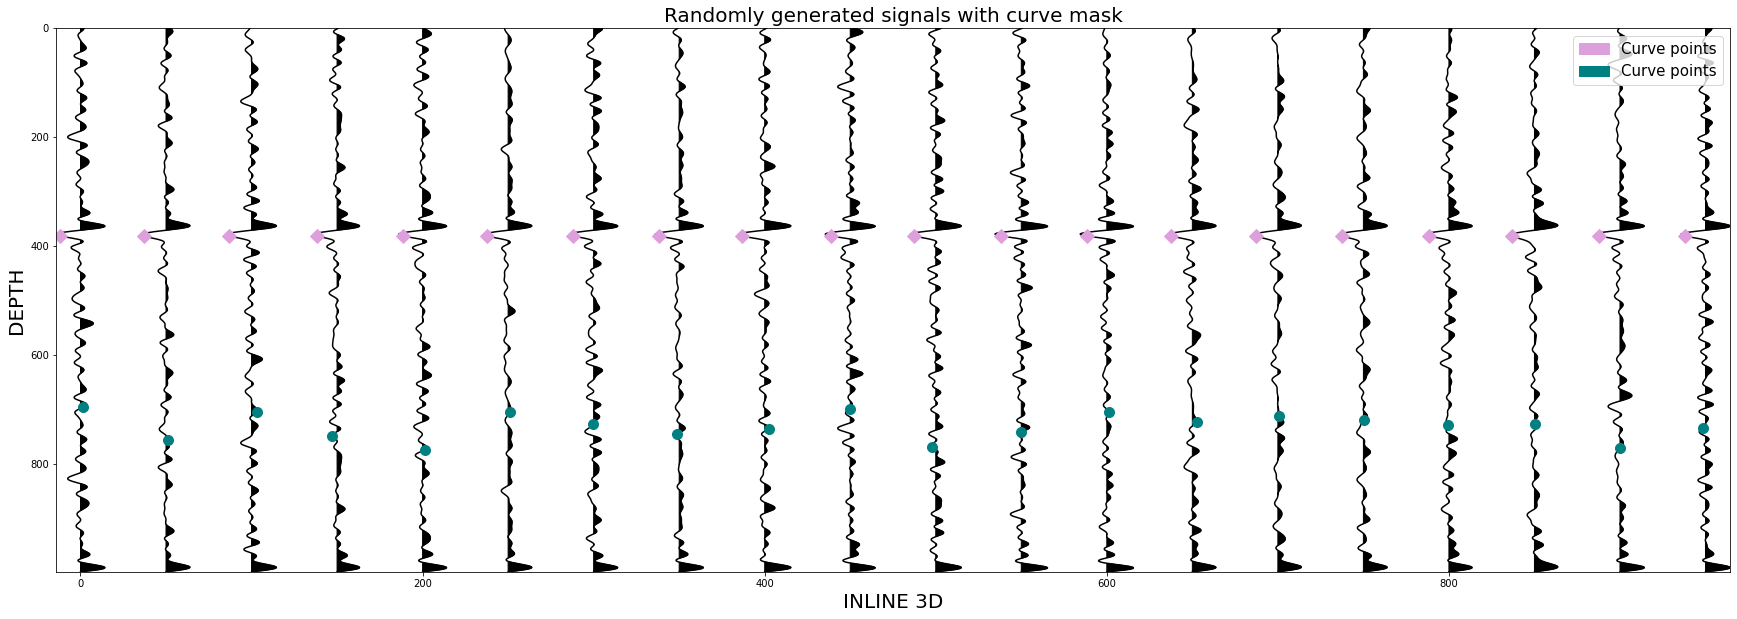

In [212]:
curve_params['color'] = ['plum', 'teal']
curve_params['marker'] = ['D', 'o']

plot_image([slide, curve_mask, extra_curve], **wiggle_params, **curve_params, **figure_params, **annotation_params)

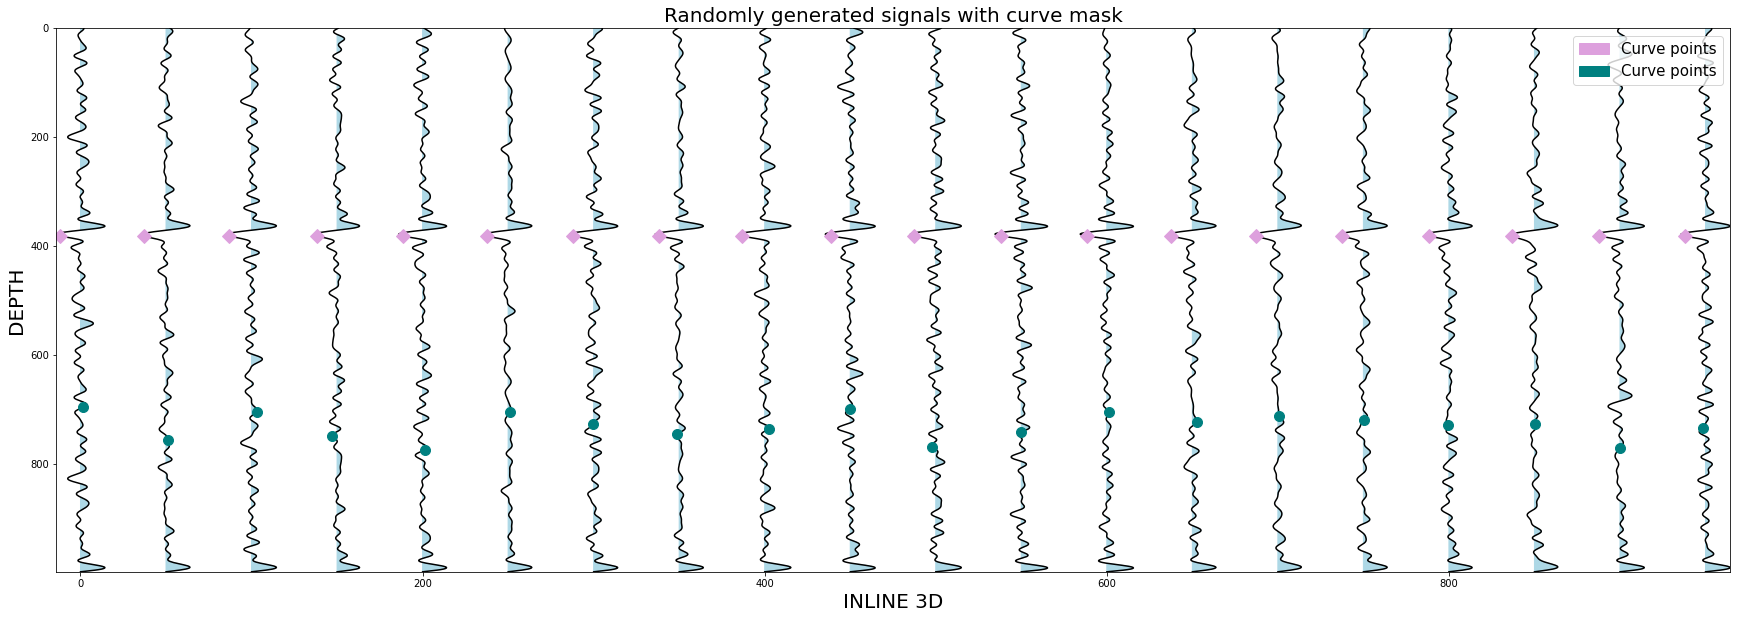

In [213]:
wiggle_params['fill_color'] = 'lightblue'

plot_image([slide, curve_mask, extra_curve], **wiggle_params, **curve_params, **figure_params, **annotation_params)

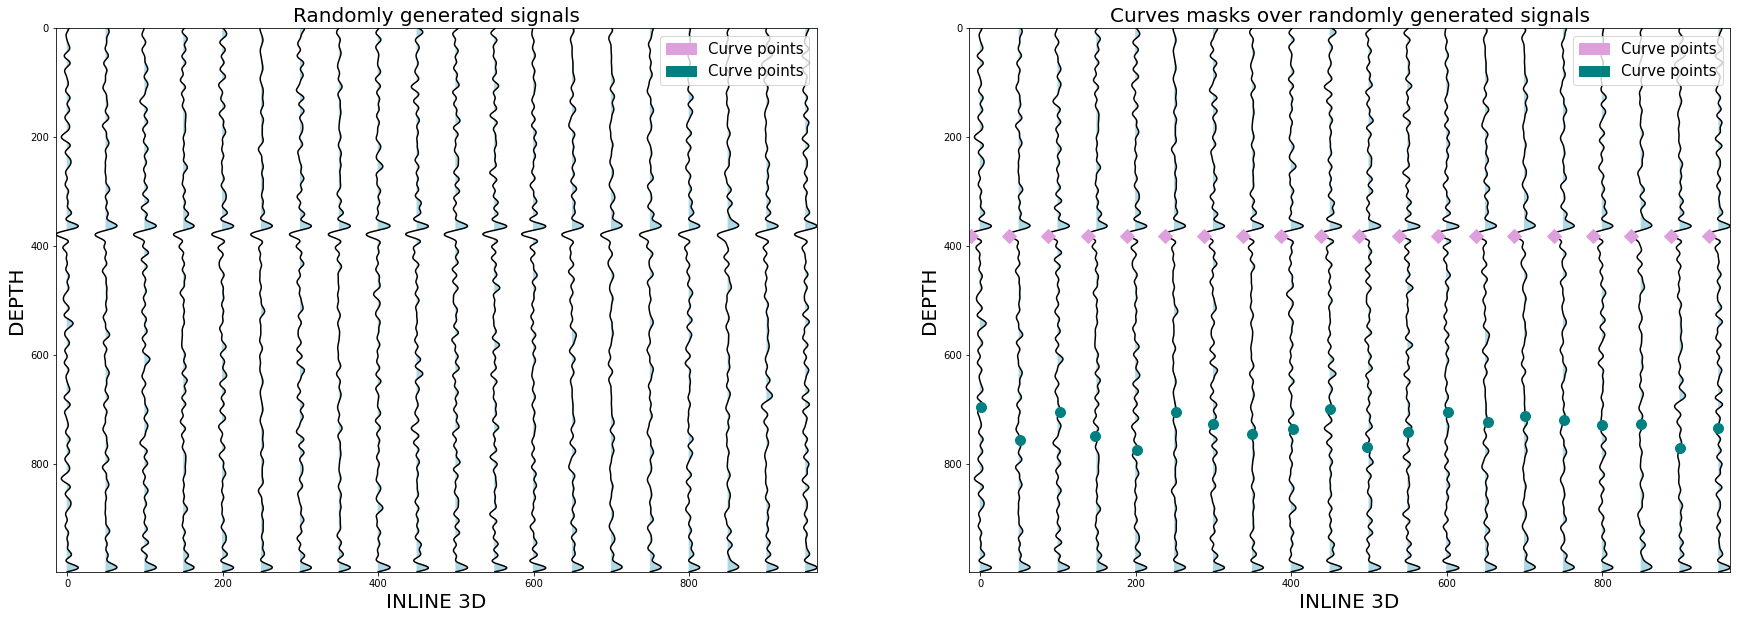

In [214]:
annotation_params['title'] = ['Randomly generated signals', 'Curves masks over randomly generated signals']

plot_image([slide, [slide, curve_mask, extra_curve]], **wiggle_params, **curve_params, **figure_params, **annotation_params)